In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing,datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
n_features = len(features)
n_features
targets = iris.target_names
n_clases = len(targets)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [4]:
classifier = MLPClassifier(hidden_layer_sizes=(10), max_iter=300,activation = 'relu', verbose=False)

In [5]:
print(cross_val_score(classifier, X_test, y_test, cv=3).mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.8444444444444444


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [6]:
def make_layers(n):
  my_list = []
  for i in range(n):
    my_list.append(10)
  return tuple(my_list)

In [ ]:
graph_data = []
for i in range(20):
  clf = MLPClassifier(hidden_layer_sizes=make_layers(i+1),max_iter=300,activation='relu',verbose=False)
  score = cross_val_score(clf,X_test,y_test, cv=3).mean()
  graph_data.append(score)

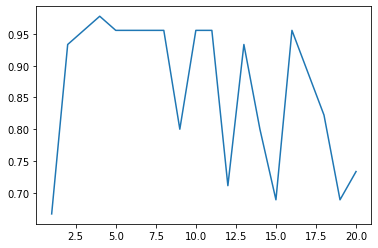

In [8]:
layers = list(range(1, 21))
plt.plot(layers,graph_data)

In [10]:
from keras.models import Sequential
from keras import layers
from keras.utils import np_utils
from keras.layers import Dense
from keras.regularizers import l2
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [11]:
output_y = np_utils.to_categorical(y_train)   
X_test = np_utils.to_categorical(X_test)
y_test = np_utils.to_categorical(y_test)

In [12]:
graph_data = {}
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
kf = KFold(n_splits=3, shuffle = True)
#for i in range(20):
param_test = list()
for param in values:
  #Make model
  model = Sequential()
  #Input layer
  model.add(Dense(8, input_dim=n_features, activation='relu', kernel_regularizer=l2(param)))
  #Hidden Layer
  model.add(Dense(8, activation='relu', kernel_regularizer=l2(param)))
  #Output layer
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  acc = 0
  recall = np.array([0., 0., 0.])
  kf = KFold(n_splits=3, shuffle = True)
  for train_index, test_index in kf.split(X):
    # Training phase
    X_train = X[train_index, :]
    y_train = y[train_index]
    y_train = np_utils.to_categorical(y_train)
    # fit model
    model.fit(X_train, y_train, epochs=300, verbose=0)
    # Test phase
    X_test = X[test_index, :]
    y_test = y[test_index]    
    # evaluate the model
    X_test = X[test_index, :]
    y_test = y[test_index]
    y_pred = np.argmax((model.predict(X_test) > 0.5).astype("int32"), axis=-1)
    cm = confusion_matrix(y_test, y_pred)
    acc += (cm[0,0]+cm[1,1]+cm[2,2])/len(y_test)  
    recall[0] += cm[0,0]/(cm[0,0] + cm[0,1] + cm[0,2])
    recall[1] += cm[1,1]/(cm[1,0] + cm[1,1] + cm[1,2])
    recall[2] += cm[2,2]/(cm[2,0] + cm[2,1] + cm[2,2])
  score = acc/3
  recall = recall/3
  print('Param: %f, Accuracy: %.3f, Recall: %.3f, %.3f, %.3f' % (param, score, recall[0], recall[1], recall[2]))
  param_test.append(score)
#graph_data[i+1] = param_test

Param: 0.100000, Accuracy: 0.853, Recall: 1.000, 0.639, 1.000
Param: 0.010000, Accuracy: 0.967, Recall: 1.000, 0.939, 0.958
Param: 0.001000, Accuracy: 0.973, Recall: 1.000, 0.940, 0.979
Param: 0.000100, Accuracy: 0.960, Recall: 1.000, 0.920, 0.963
Param: 0.000010, Accuracy: 0.967, Recall: 1.000, 0.943, 0.958
Param: 0.000001, Accuracy: 0.960, Recall: 1.000, 0.963, 0.922


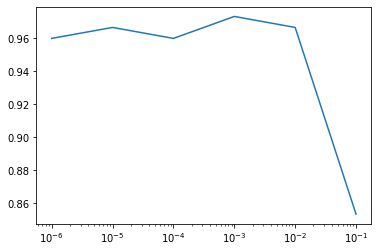

In [13]:
plt.semilogx(values, param_test)

In [14]:
def get_clf_model(hidden_layers, param):
  model = Sequential()
  model.add(Dense(8, input_dim=n_features, activation='relu', kernel_regularizer=l2(param)))
  for i in range(hidden_layers):
    model.add(Dense(8, activation='relu', kernel_regularizer=l2(param)))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [15]:
graph_data = {}
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
kf = KFold(n_splits=3, shuffle = True)
for i in range(20):
  param_test = list()
  for param in values:
    #Make model
    model = get_clf_model(i+1,param)
    acc = 0
    recall = np.array([0., 0., 0.])
    kf = KFold(n_splits=3, shuffle = True)
    for train_index, test_index in kf.split(X):
      # Training phase
      X_train = X[train_index, :]
      y_train = y[train_index]
      y_train = np_utils.to_categorical(y_train)
      # fit model
      model.fit(X_train, y_train, epochs=300, verbose=0)
      # Test phase
      X_test = X[test_index, :]
      y_test = y[test_index]    
      # evaluate the model
      X_test = X[test_index, :]
      y_test = y[test_index]
      y_pred = np.argmax((model.predict(X_test) > 0.5).astype("int32"), axis=-1)
      cm = confusion_matrix(y_test, y_pred)
      acc += (cm[0,0]+cm[1,1]+cm[2,2])/len(y_test)  
      recall[0] += cm[0,0]/(cm[0,0] + cm[0,1] + cm[0,2])
      recall[1] += cm[1,1]/(cm[1,0] + cm[1,1] + cm[1,2])
      recall[2] += cm[2,2]/(cm[2,0] + cm[2,1] + cm[2,2])
    score = acc/3
    recall = recall/3
    print('Layer: %f, Param: %f, Accuracy: %.3f, Recall: %.3f, %.3f, %.3f' % (i+1, param, score, recall[0], recall[1], recall[2]))
    param_test.append(score)
  graph_data[i+1] = param_test

Layer: 1.000000, Param: 0.100000, Accuracy: 0.927, Recall: 1.000, 0.794, 0.983
Layer: 1.000000, Param: 0.010000, Accuracy: 0.980, Recall: 1.000, 0.950, 1.000
Layer: 1.000000, Param: 0.001000, Accuracy: 0.967, Recall: 1.000, 0.919, 0.976
Layer: 1.000000, Param: 0.000100, Accuracy: 0.973, Recall: 1.000, 0.930, 1.000
Layer: 1.000000, Param: 0.000010, Accuracy: 0.973, Recall: 1.000, 0.949, 0.982
Layer: 1.000000, Param: 0.000001, Accuracy: 0.980, Recall: 1.000, 0.942, 1.000
Layer: 2.000000, Param: 0.100000, Accuracy: 0.967, Recall: 1.000, 0.936, 0.952
Layer: 2.000000, Param: 0.010000, Accuracy: 0.953, Recall: 1.000, 0.929, 0.952
Layer: 2.000000, Param: 0.001000, Accuracy: 0.967, Recall: 1.000, 0.944, 0.954
Layer: 2.000000, Param: 0.000100, Accuracy: 0.780, Recall: 1.000, 0.632, 0.667
Layer: 2.000000, Param: 0.000010, Accuracy: 0.973, Recall: 1.000, 0.963, 0.965
Layer: 2.000000, Param: 0.000001, Accuracy: 0.973, Recall: 1.000, 0.926, 1.000
Layer: 3.000000, Param: 0.100000, Accuracy: 0.913, R

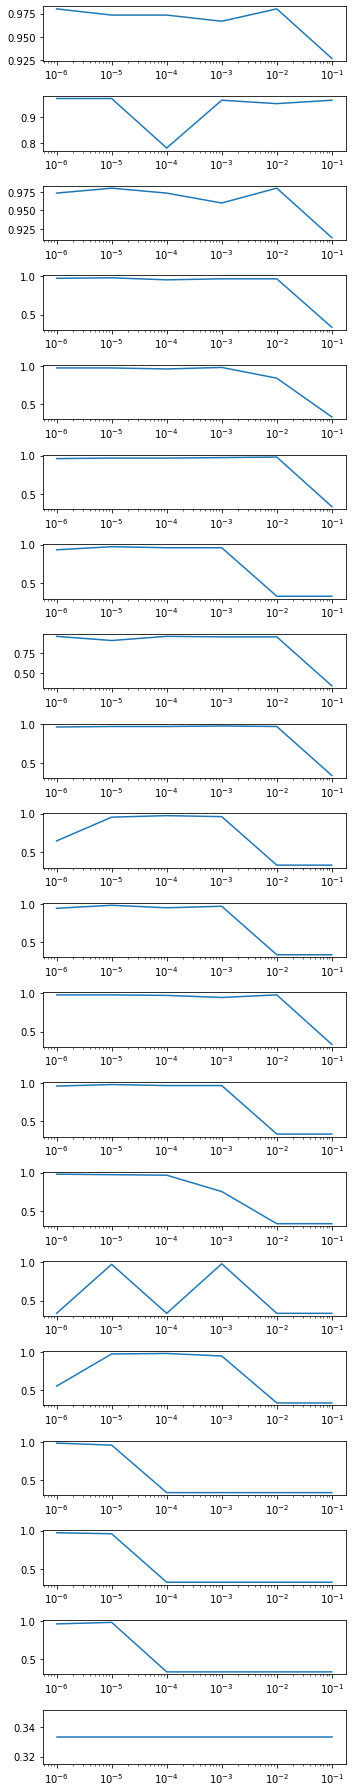

In [16]:
fig = plt.figure(figsize=(5,25)) 
for key in graph_data:
  plt.subplot(20,1,key)
  plt.semilogx(values, graph_data[key])
plt.tight_layout()